# Diabetes Health Indicators Dataset
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

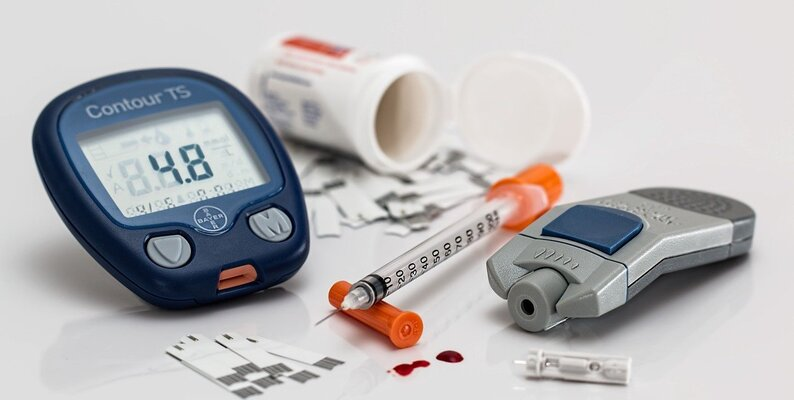

## Introduction

The dataset originally has 330 features (columns) but based on diabetes disease research regarding factors influencing diabetes disease and other chronic health conditions the publisher of that dataset clean BRFSS data into a useable format for machine learning alogrithms.

### Important risk factors for diabetes :

( blood pressure (high) , cholesterol (high) , smoking , diabetes , obesity , age , sex , race , diet , exercise , alcohol consumption , BMI , Household Income , Marital Status , Sleep , Time since last checkup , Education , Health care coverage , Mental Health )

###### About Columns :
- **Diabetes_binary** : you have diabetes (0,1)

- **HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

- **HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

- **CholCheck** : Cholesterol check within past five years (0,1)

- **BMI** : Body Mass Index (BMI)

- **Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

- **Stroke** : (Ever told) you had a stroke. (0,1)

- **HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

- **PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

- **Fruits** : Consume Fruit 1 or more times per day (0,1)

- **Veggies** : Consume Vegetables 1 or more times per day (0,1)

- **HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

- **AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

- **NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

- **GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

- **MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

- **PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

- **DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

- **Sex** : Indicate sex of respondent (0,1) (Female or Male)

- **Age** : Fourteen-level age category (1 ~ 14)

- **Education** : What is the highest grade or year of school you completed? (1 ~ 6)

- **Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

### Import Libraries

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick
import missingno as msno

# !pip install pycaret
# !pip install --upgrade pycaret #if you have installed beta version in past, run the below code to upgrade
from pycaret.classification import *
from pycaret.datasets import get_data

# for fixing the imbalanced dataset and split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


### Data Exploring

In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv' , sep=',' , encoding='utf-8')
df

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[253680 rows x 22 columns]

### Dataset Report

My Report
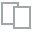
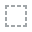
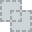
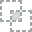
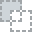
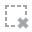
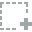
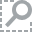
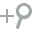
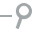
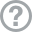
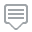
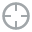
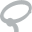
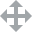
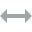
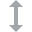
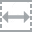
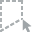
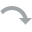
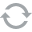
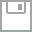
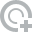
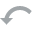
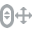
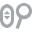
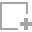
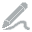
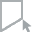
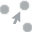
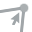
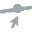

In [ ]:
# !pip install dataprep
from dataprep.eda import create_report
report = create_report(df, title='My Report')
report

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_binary       253680.0   0.139333  0.346294   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
duplicates =df[df.duplicated()]
print('Duplicate Row :' , len(duplicates))
duplicates.head()

Duplicate Row : 24206


Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242              1.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563              0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700              0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160              0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

      HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1242                   0.0           0.0     0.0  ...            1.0   
1563                   0.0           1.0     1.0  ...            1.0   
2700                   0.0           1.0     1.0  ...            1.0   
3160                   0.0           1.0     1.0  ...            1.0   
3332                   0.0           1.0     1.0  ...            1.0   

      NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
1242          0.0      5.0       0.0      30.0       1.0  0.0  10.0   
1563          0.0      1.0       0.0       0.0       0.0  0.0   4.0   
2700          0.0      2.0       0.0       0.0       0.0  0.0   5.0   
3160          0.0      1.0       0.0       0.0       0.0  0.0   4.0   
3332          0.0      1.0       0.0       0.0       0.0  1.0   9.0   

      Education  Income  
1242        4.0     5.0  
1563        6.0     8.0  
2700        6.0     8.0  
3160        6.0     8.0  
3332        6.0     8.0  

[5 rows x 22 columns]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(229474, 22)

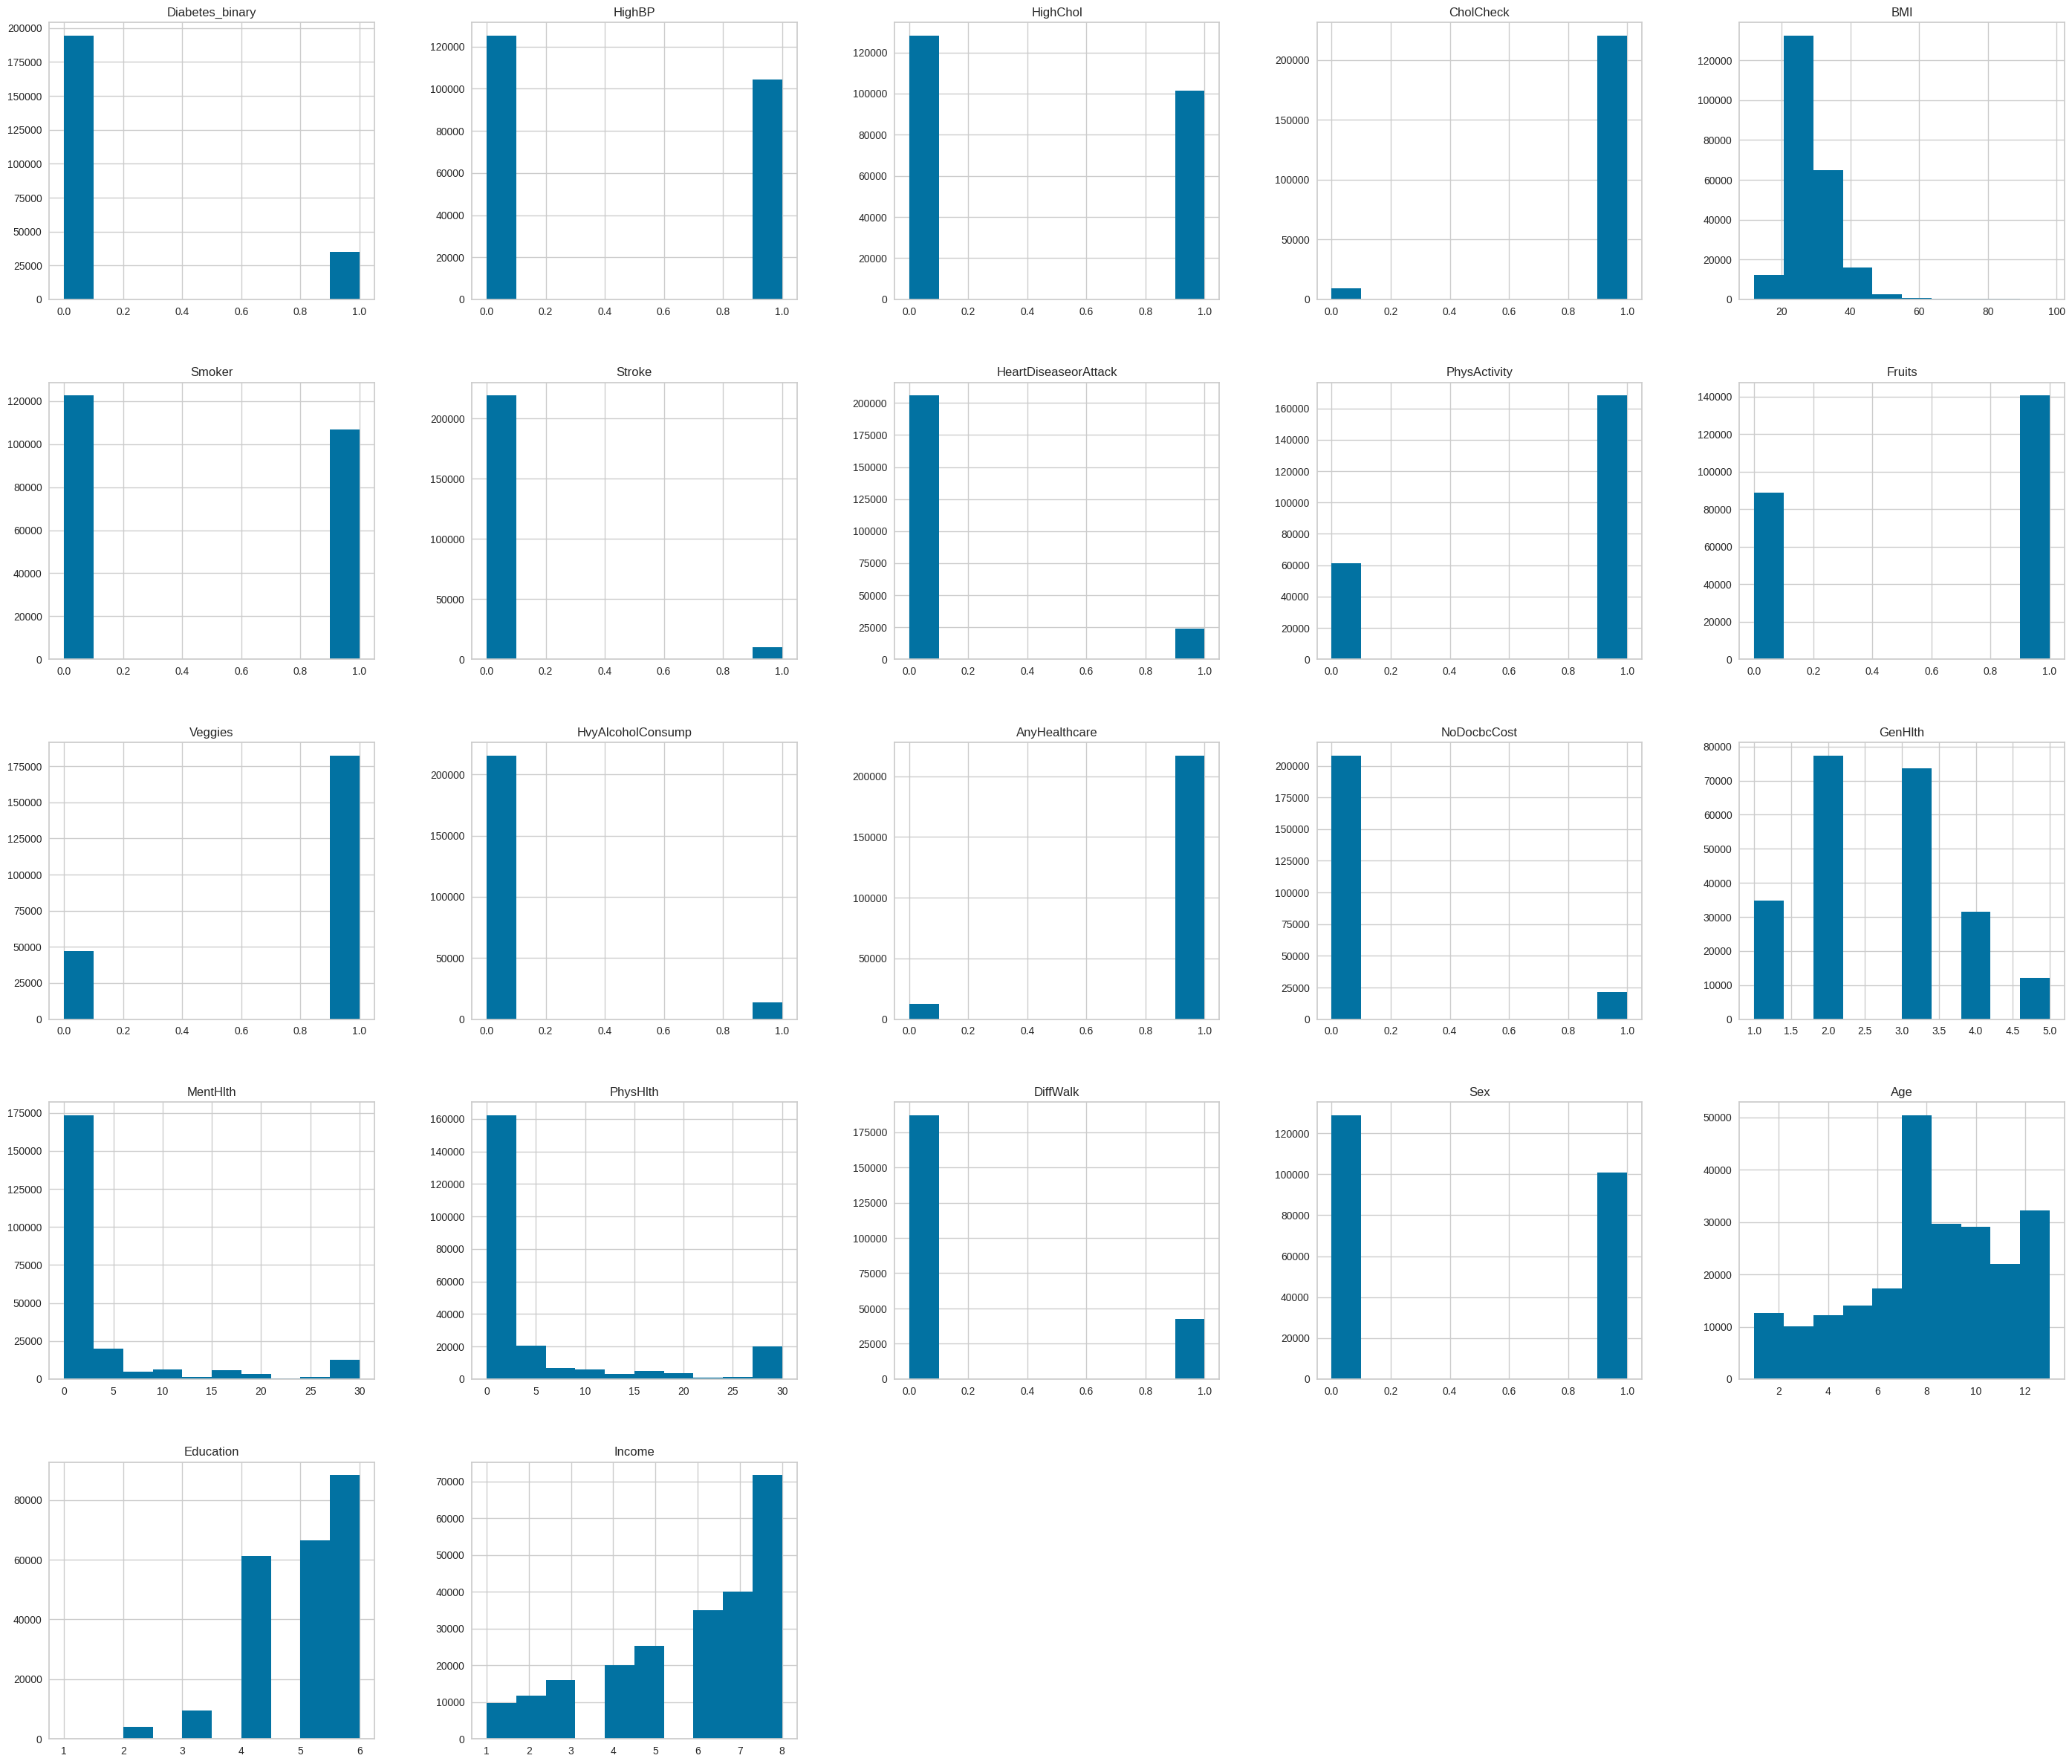

In [ ]:
df.hist(figsize=(35,30));

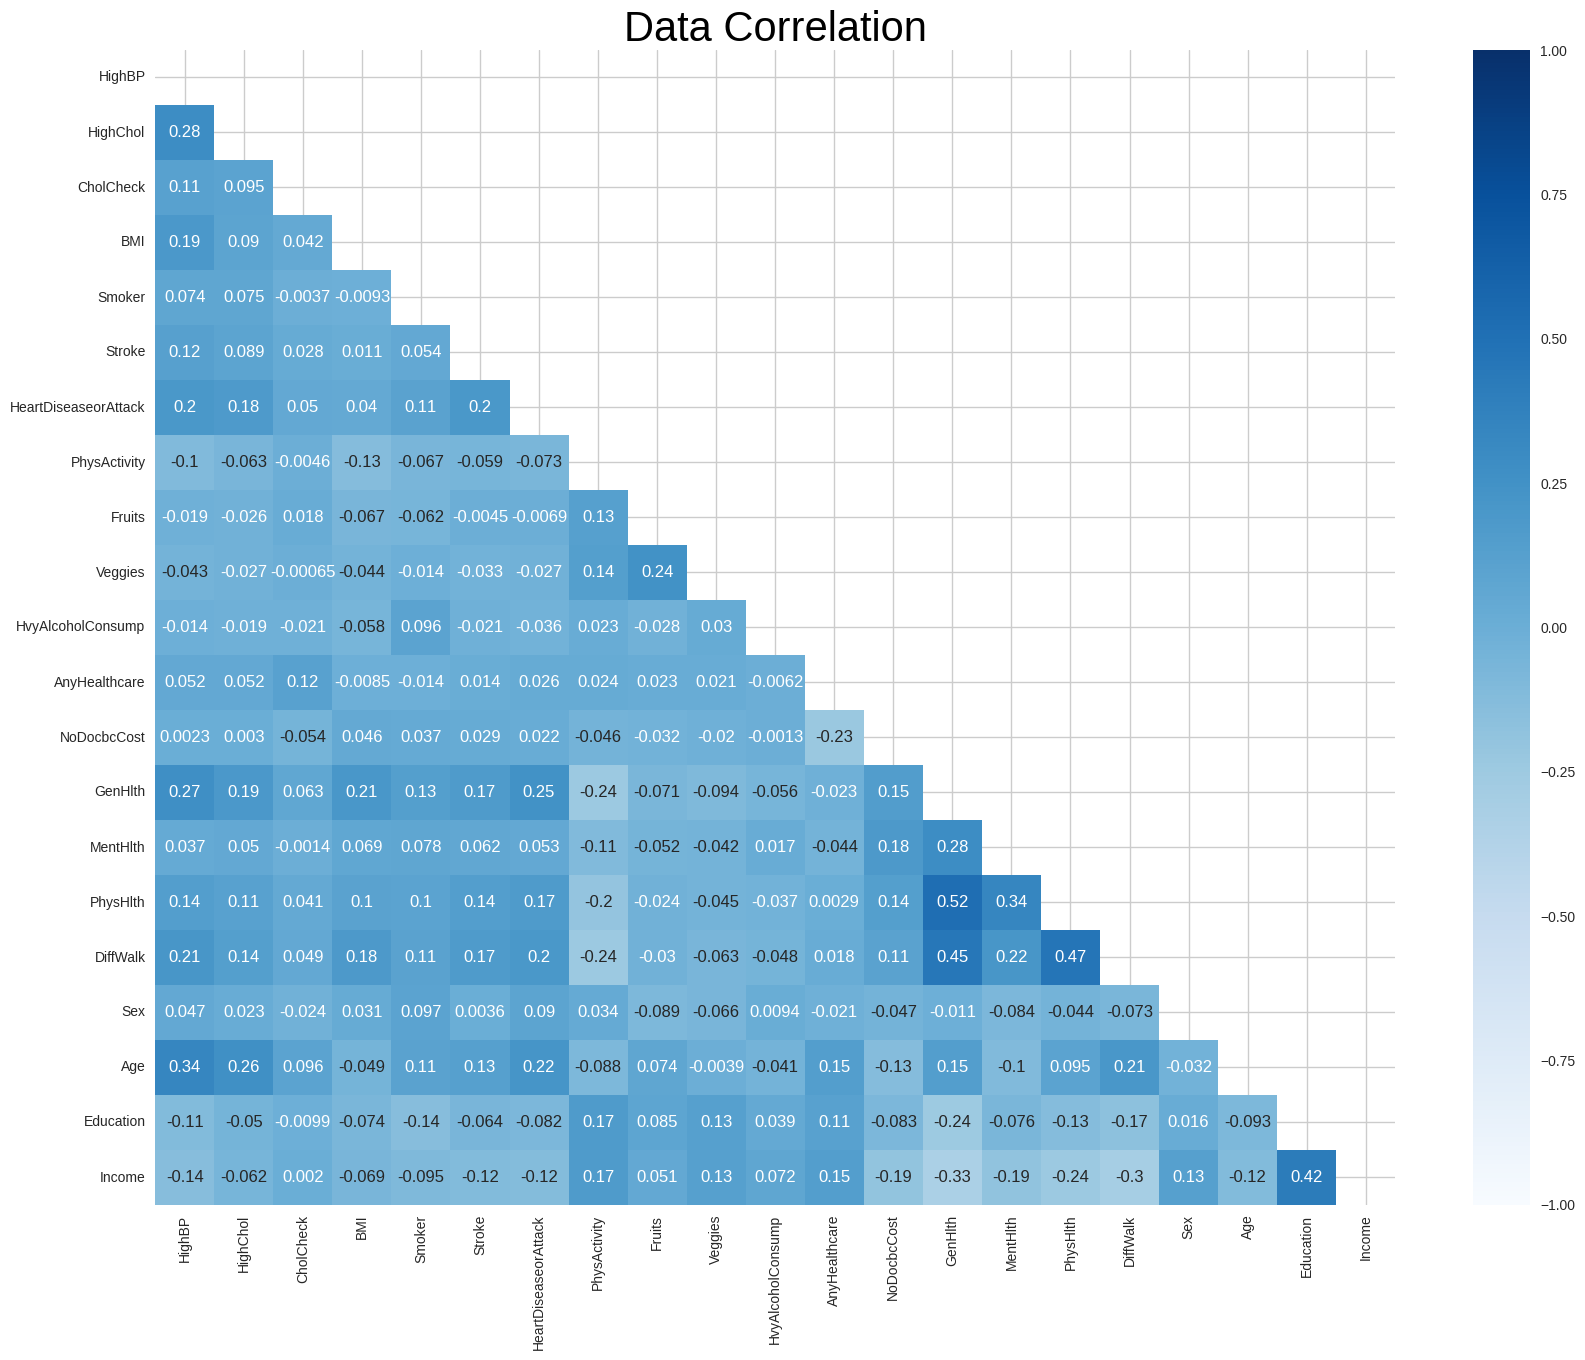

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['Diabetes_binary']).corr()))
sns.heatmap(df.drop(columns=['Diabetes_binary']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize =30)
plt.show()

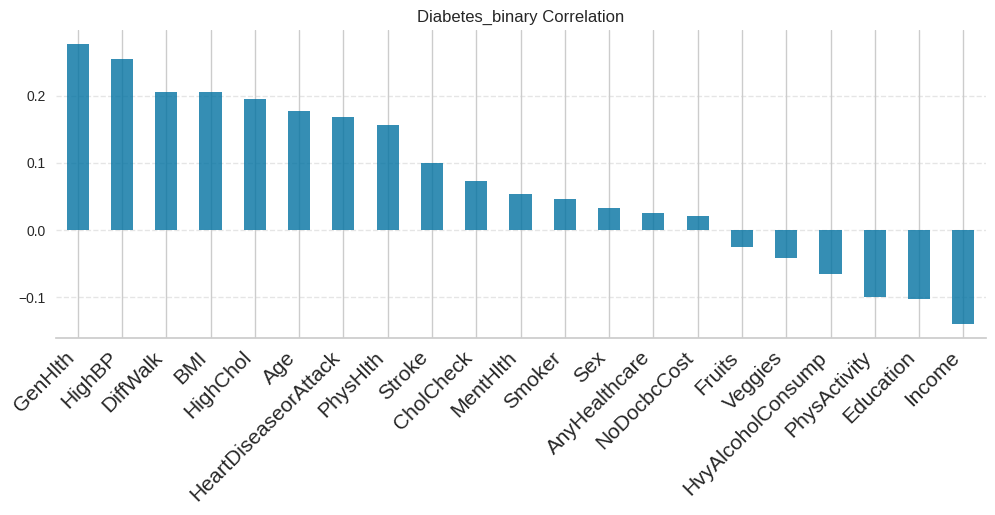

In [ ]:
(df.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

###This variables have more correlated with the target variable Diabetes_binary
- GenHlth- HighBP- DiffWalk- BMI-HighChol- Age
- HeartDiseaseorAttack- PhysHlth
- Physactivity
- Education
- Income
###This variables that have a very weak correlation

- AnyHealthcare
- NoDocbcCost
- Fruits
- Sex
- Smoker
- Veggies

## Q1:Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?

1.0     35097
0.0    194377
Name: Diabetes_binary, dtype: int64
1.0    15.294543%
0.0    84.705457%
Name: Diabetes_binary, dtype: object



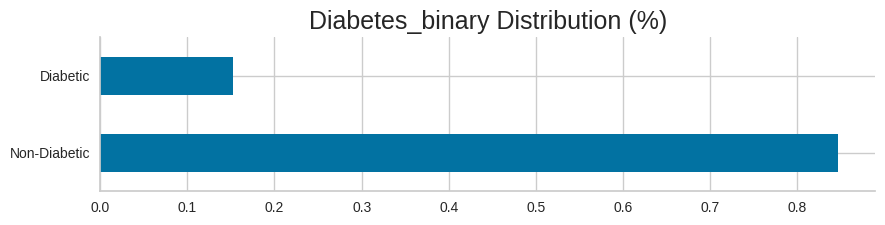

In [ ]:
print(df['Diabetes_binary'].value_counts(ascending=True))
print(df['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [ ]:
colors = ['#be4d25','#2596be']
def analyse_cat(var):
    (df.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

In [ ]:
# grouped variables
target = 'Diabetes_binary'
bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in df.columns if var not in bool_vars and var != 'Diabetes_binary']

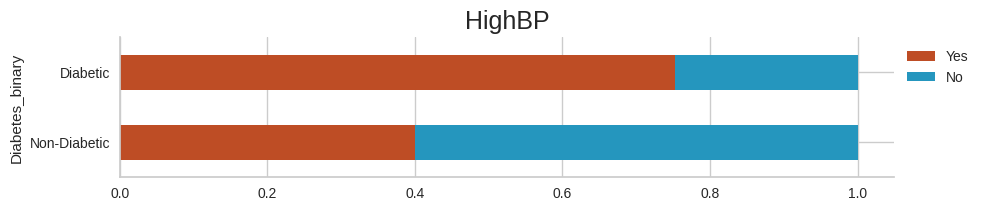

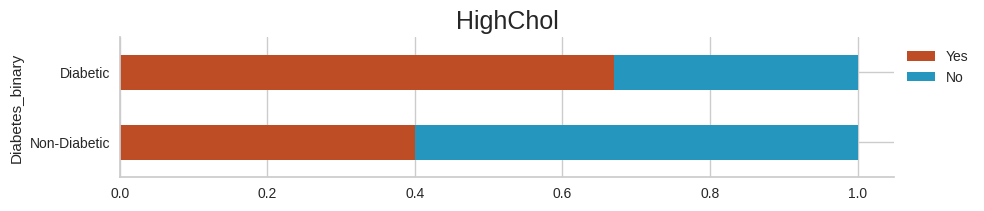

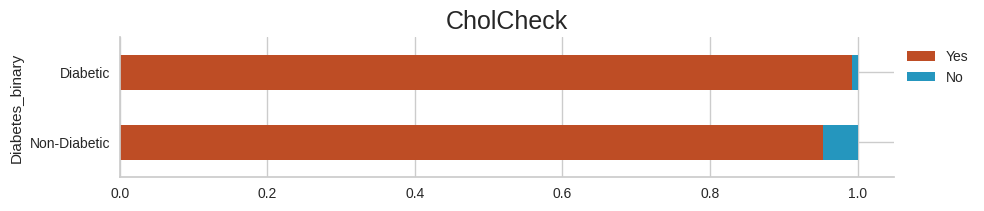

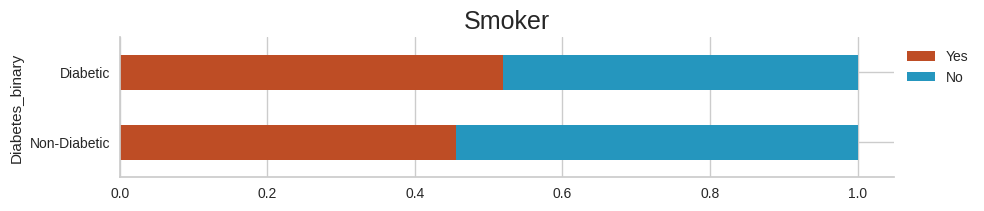

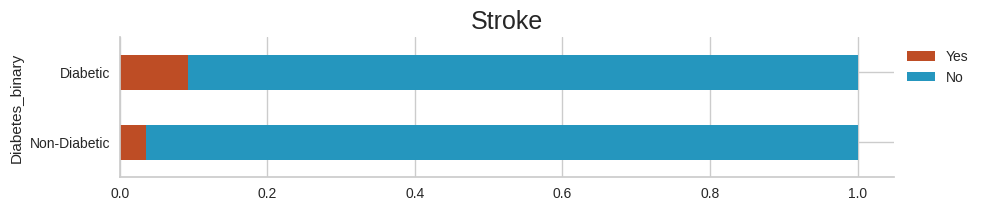

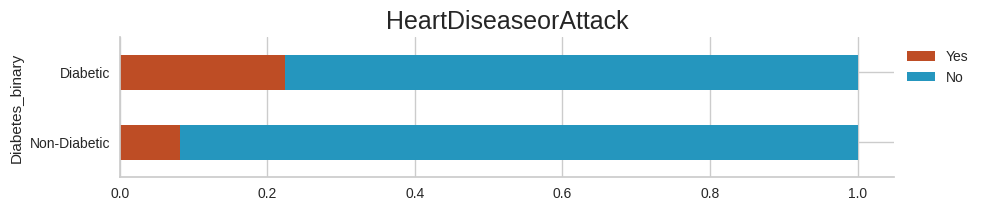

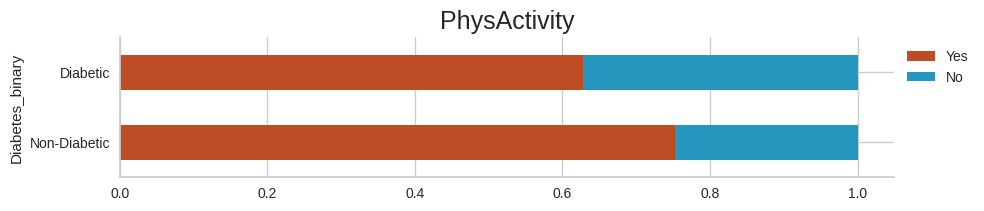

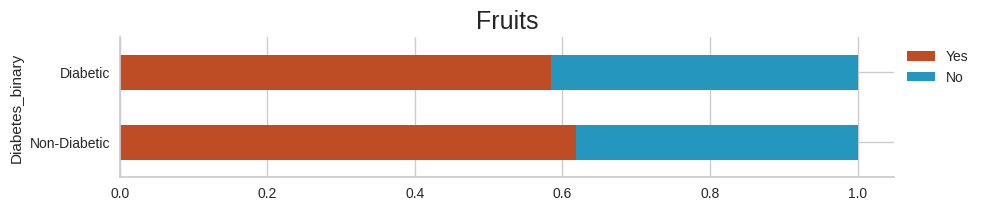

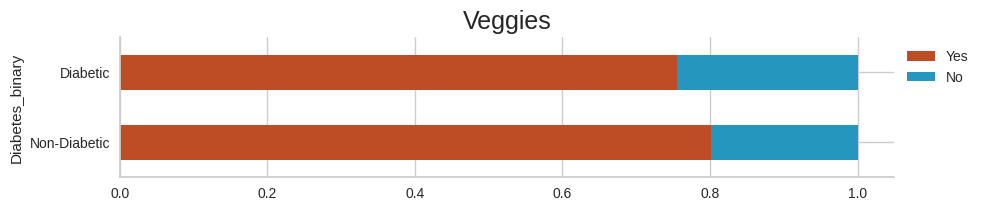

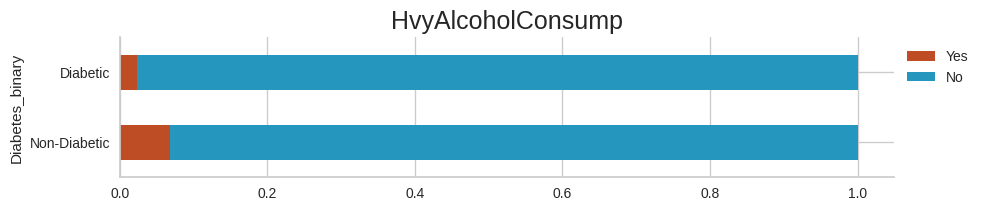

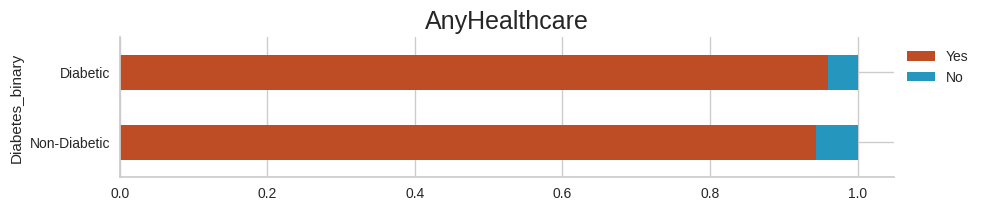

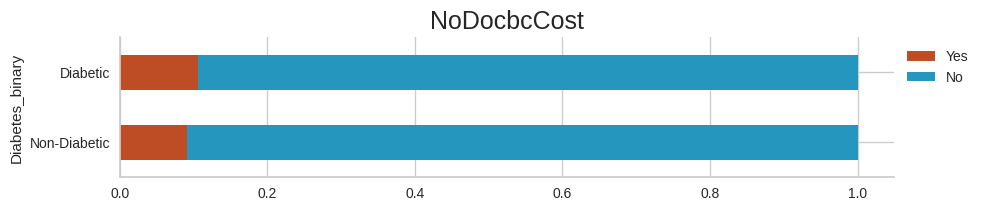

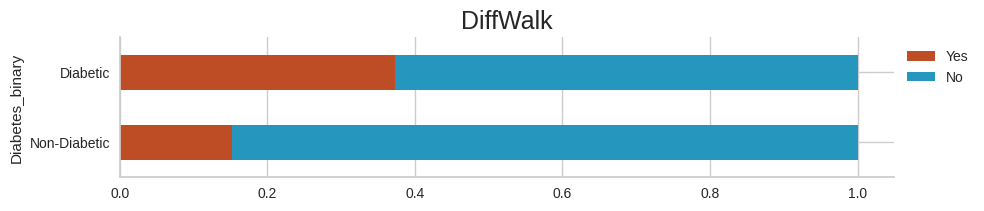

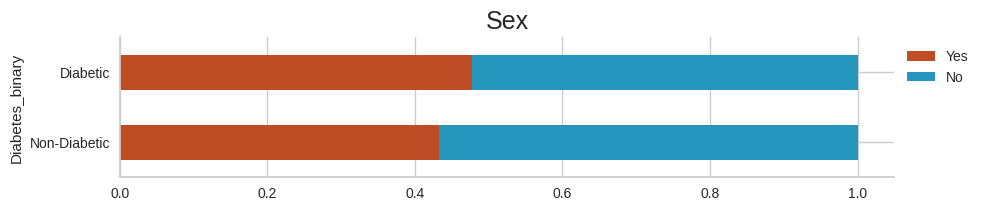

In [ ]:
for var in bool_vars:
    analyse_cat(var)

##HighBP
MetaData explains that is patient Blood pressure classification.

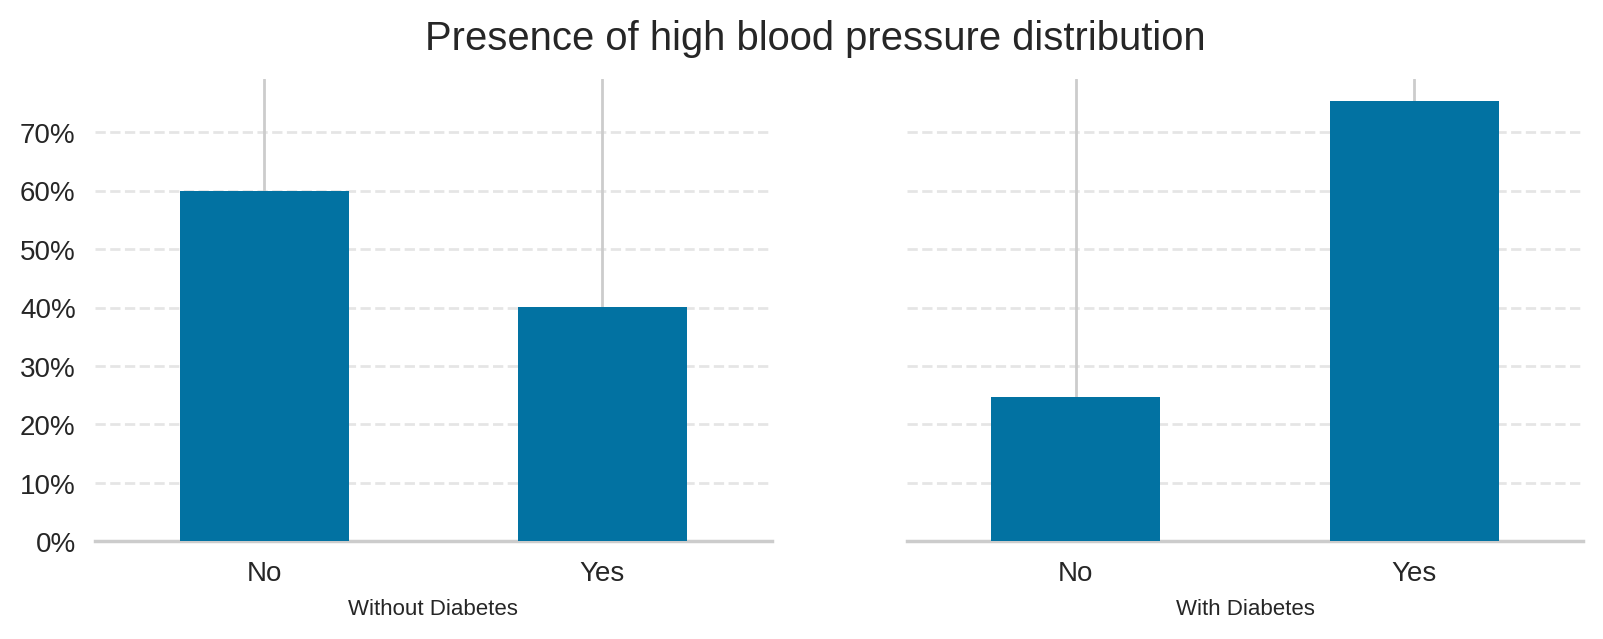

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of high blood pressure distribution')

(df[df['Diabetes_binary']==False]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df[df['Diabetes_binary']==True]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly greater incidence of hypertension compared to those without the condition

###HighChol
MetaData explains that is patient cholesterol classification

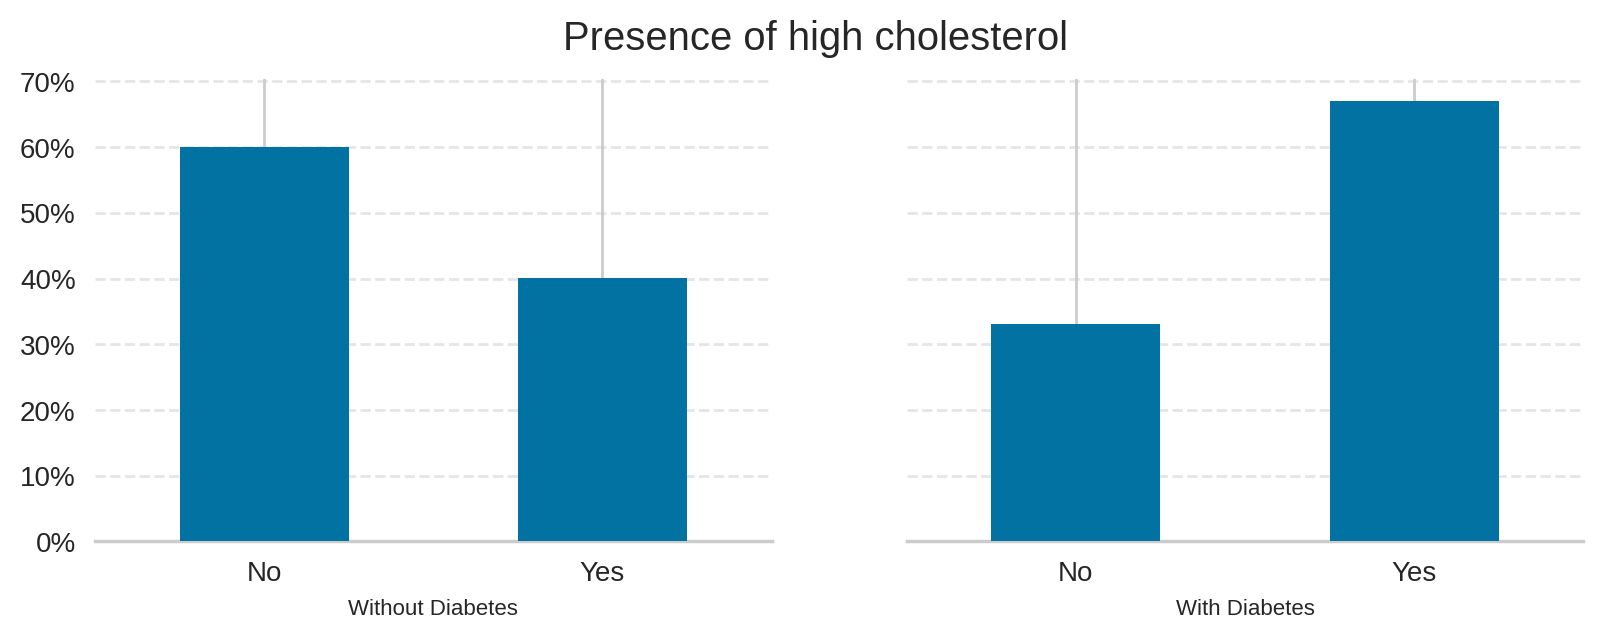

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of high cholesterol')

(df[df['Diabetes_binary']==False]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df[df['Diabetes_binary']==True]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly higher cholesterol compared to those without the condition

###Age


- 1 = 18-24 years old
- 2 = 25-29 years old
- 3 = 30-34 years old
- 4 = 35-39 years old
- 5 = 40-44 years old
- 6 = 45-49 years old
- 7 = 50-54 years old
- 8 = 55-59 years old
- 9 = 60-64 years old
- 10 = 65-69 years old
- 11 = 70-74 years old
- 12 = 75-79 years old
- 13 = 80 years and older

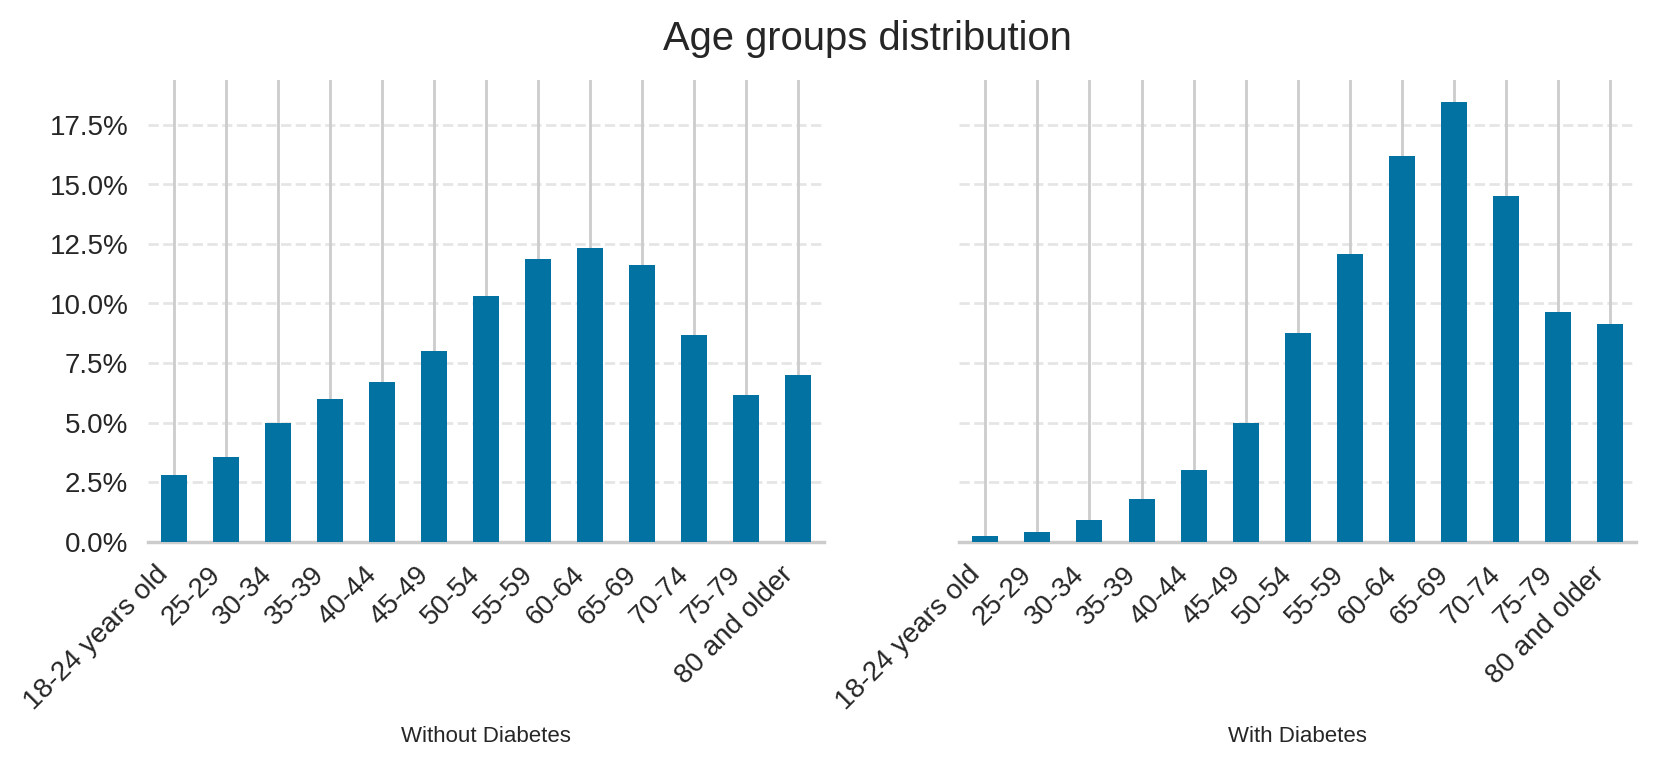

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Age groups distribution')
age_groups = ['18-24 years old', '25-29', '30-34',
              '35-39', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74',
              '75-79', '80 and older']


(df[df['Diabetes_binary']==False]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(age_groups)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

(df[df['Diabetes_binary']==True]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(age_groups)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');

According to the dataset analysis, there was a notable concentration of individuals diagnosed with Diabetes between the ages of 50 to 74 years, in contrast to those without the condition.

##HeartDiseaseorAttack
MetaData explains that is patient condition presence coronary heart disease (CHD) or myocardial infarction (MI).

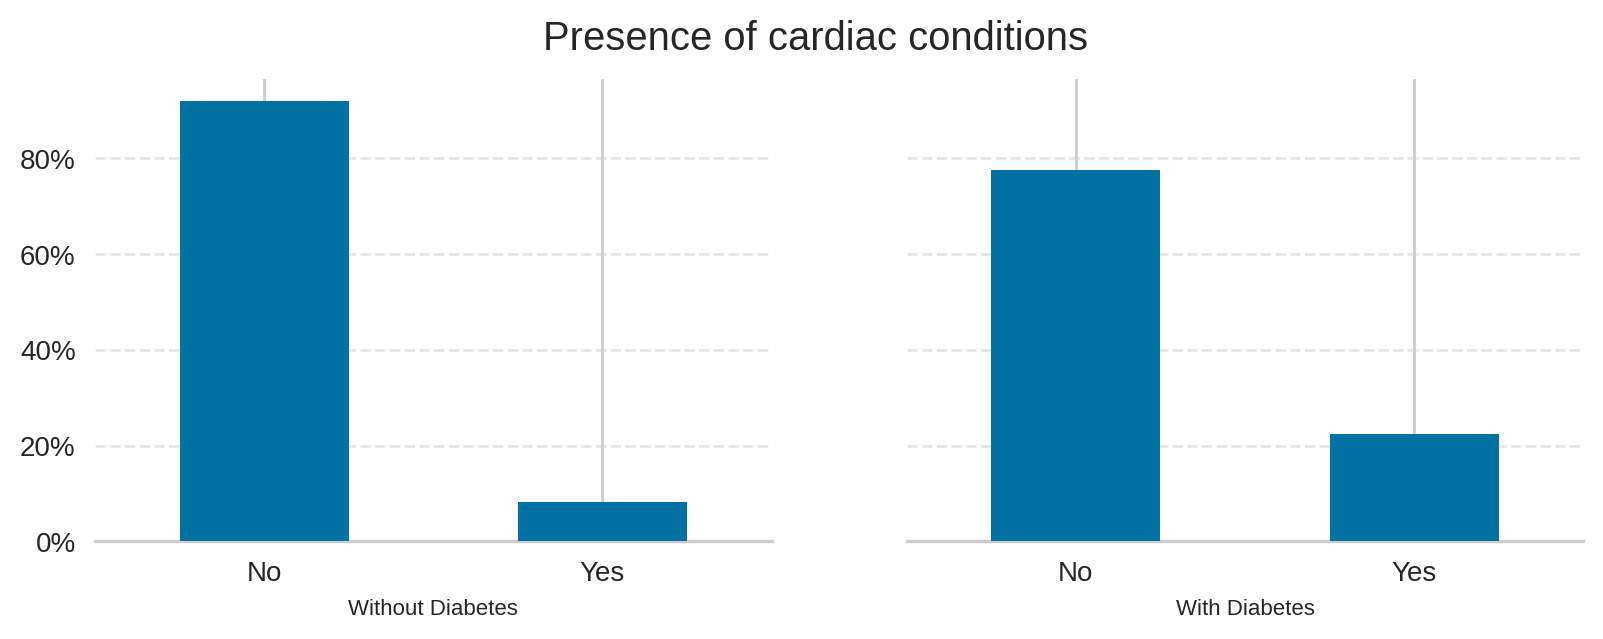

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of cardiac conditions')

(df[df['Diabetes_binary']==False]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df[df['Diabetes_binary']==True]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly cardiac conditions increase compared to those without the condition

##PhysHlth
MetaData explains that is patient presence of physical illness and injury, for how many days during the past 30.

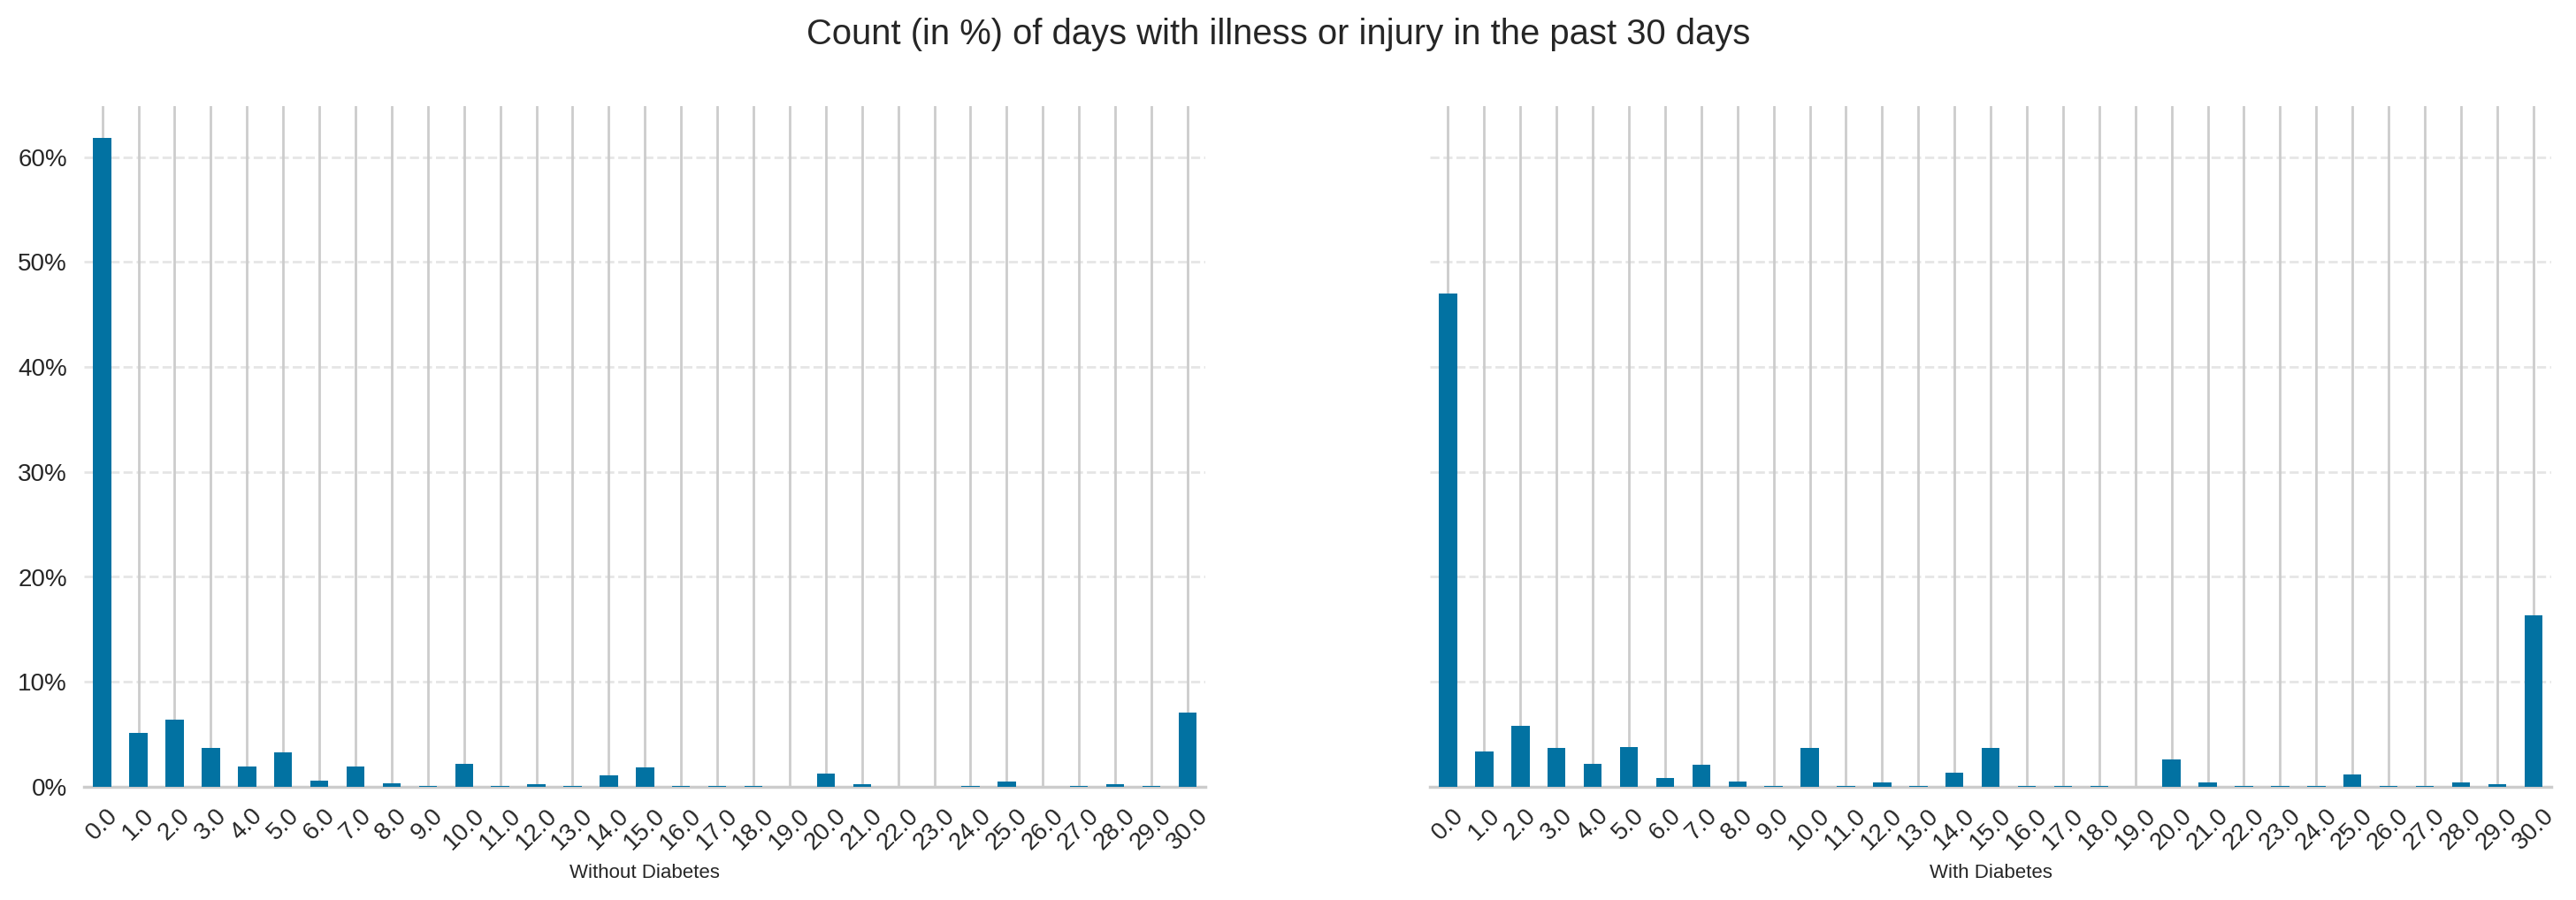

In [ ]:
ratio = 5
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.6,ratio), dpi=200, sharey=True)
fig.suptitle('Count (in %) of days with illness or injury in the past 30 days')

(df[df['Diabetes_binary']==False]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

(df[df['Diabetes_binary']==True]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

## PhysActivity
physical activity in past 30 days (not including job).

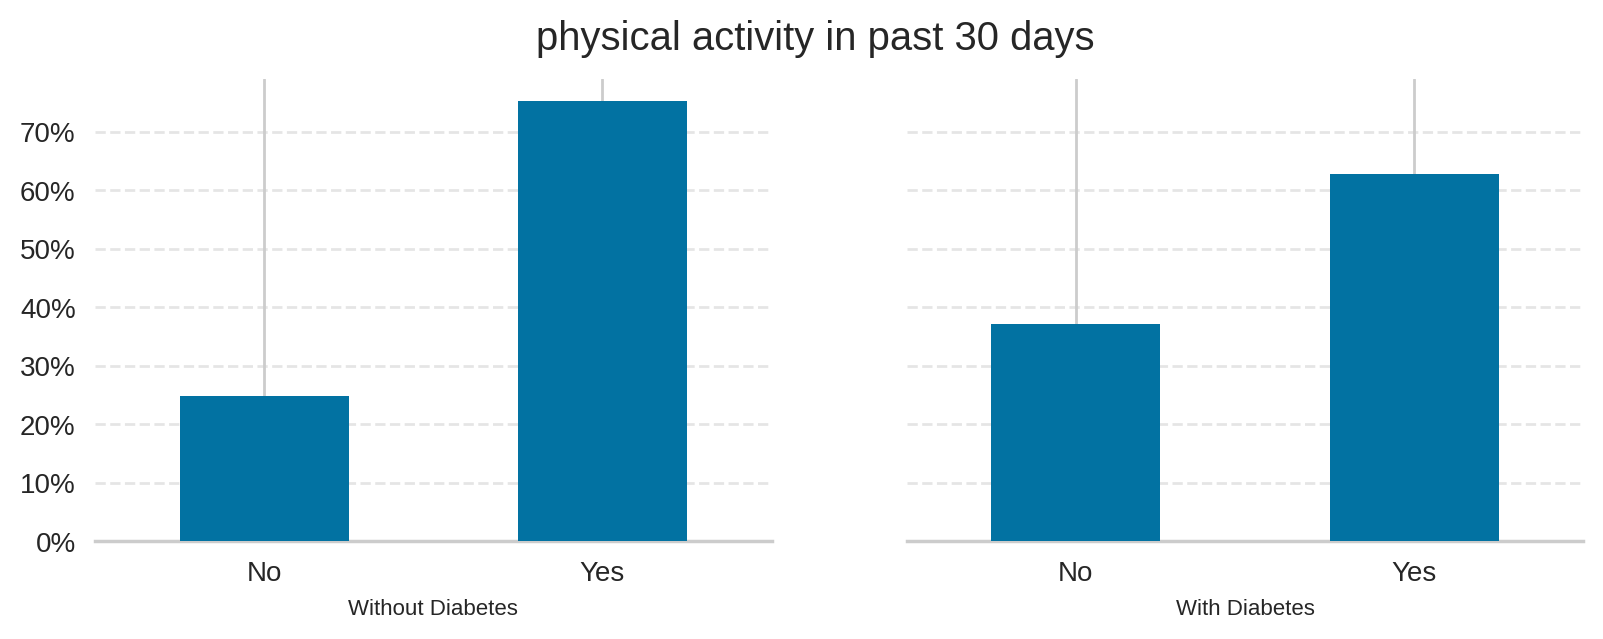

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('physical activity in past 30 days')

(df[df['Diabetes_binary']==False]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(df[df['Diabetes_binary']==True]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly presence of days with some type of illness or injury compared to those without the condition

## BMI
Body Mass Index (BMI) is a measure of body fat based on a person's weight and height. It is calculated by dividing a person's weight in kilograms by the square of their height in meters (kg/m²).

\begin{equation} BMI = \frac{weight \ (kg)}{height^2 \ (m^2)} \end{equation}

BMI provides an estimation of the amount of body fat a person has, and is commonly used as a screening tool to identify individuals who may be at a higher risk for weight-related health problems, such as diabetes, heart disease, and certain types of cancer.

##How is BMI interpreted for adults?
#####According with CDC:

**For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.**

- If your BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
- If your BMI is 25.0 to 29.9, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obese range. A new column was created with this range names.

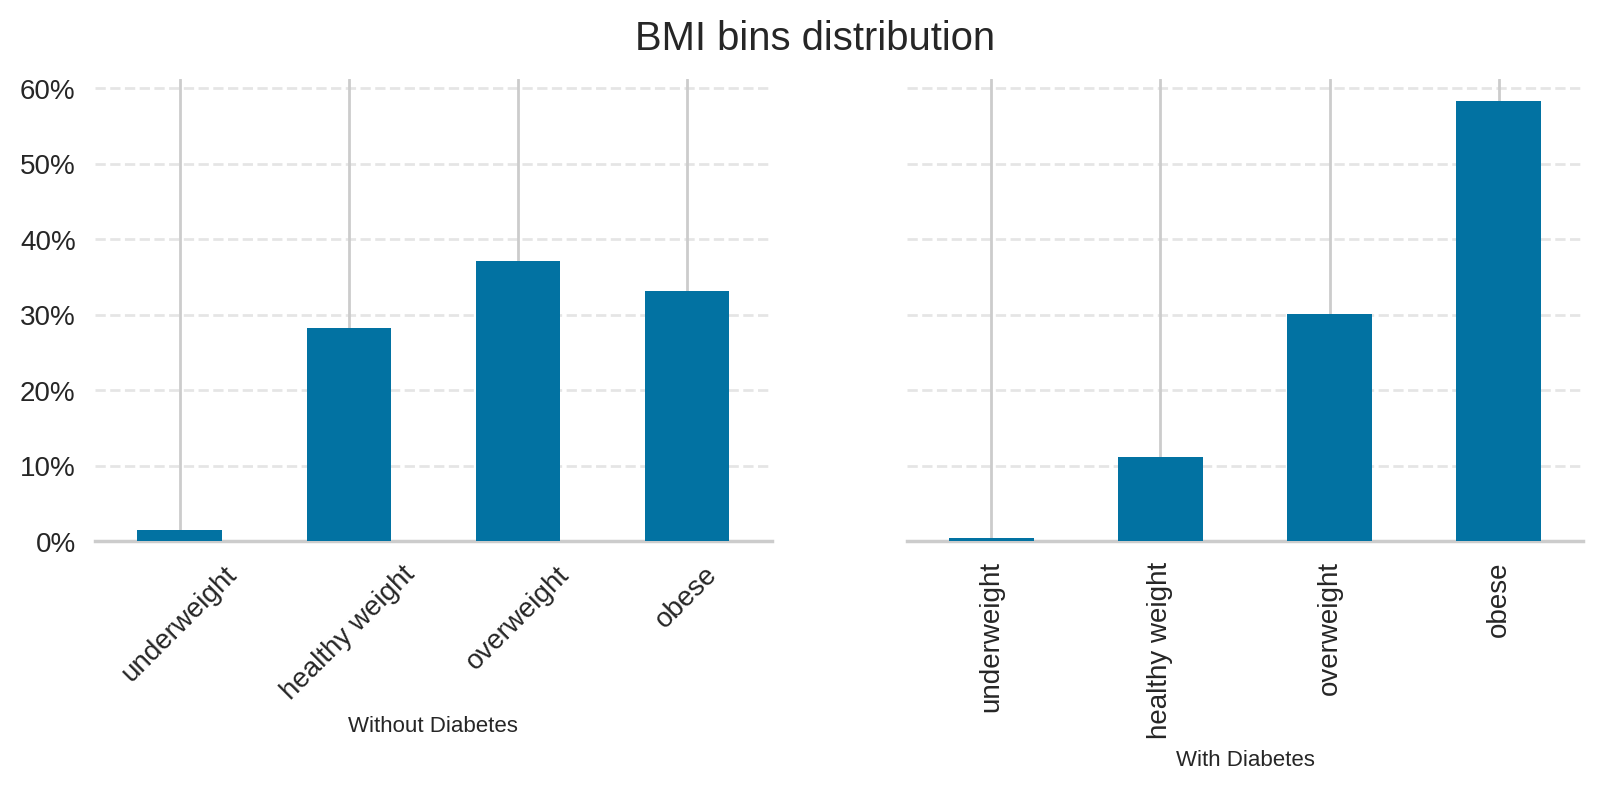

In [ ]:
# create new binned column
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['underweight', 'healthy weight', 'overweight', 'obese']
df2 =df.copy()
df2['BMI_bins'] = pd.cut(df2['BMI'], bins=bins, labels=labels)

ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('BMI bins distribution')

(df2[df2['Diabetes_binary']==False]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(df2[df2['Diabetes_binary']==True]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_xticklabels(labels)
ax2.grid(axis='y', linestyle='--', alpha=.5)

###**GenHlth**
The metadata of the dataset indicates that patients were asked to rate their overall health status on a 1-5 scale, where:

- 1 = Excellent
- 2 = very good
- 3 = good
- 4 = fair
- 5 = poor

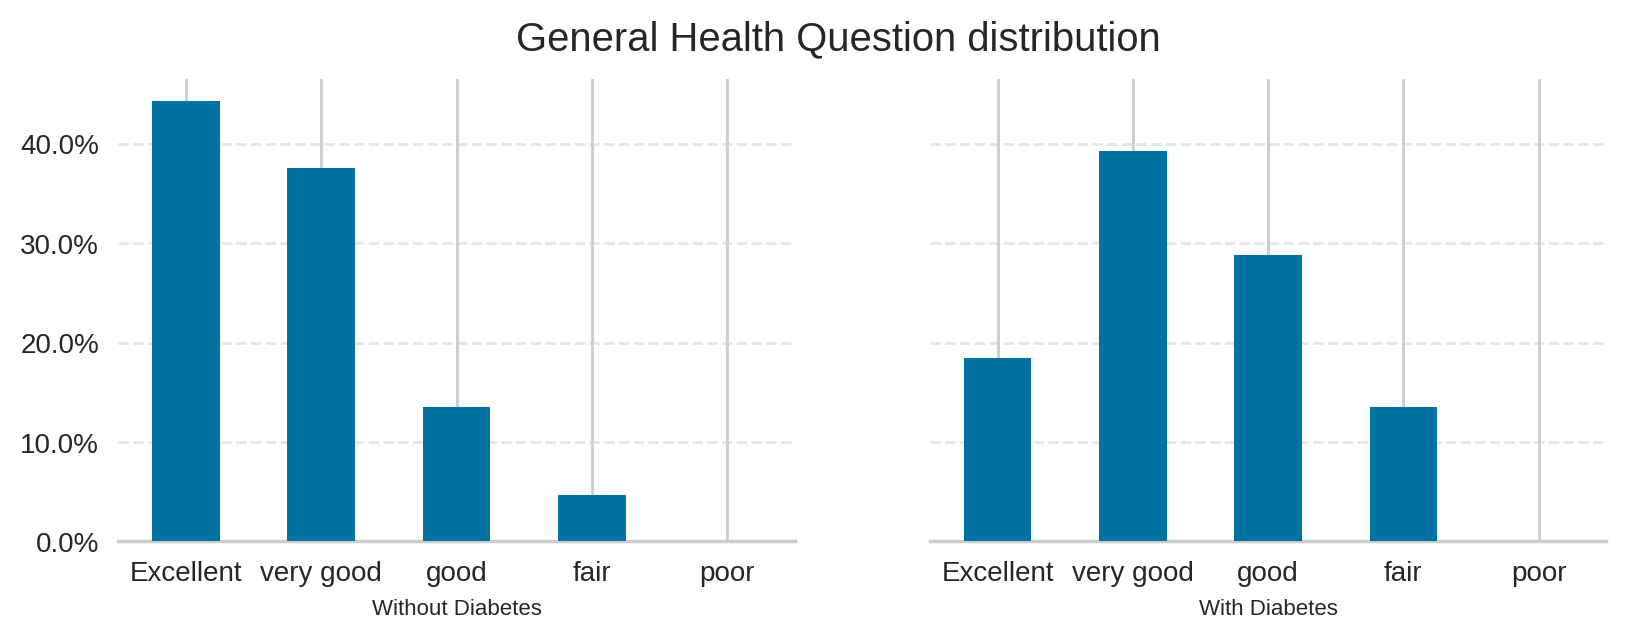

In [ ]:
# create new binned column
bins = [1, 2, 3, 4,5, float('inf')]
labels = ['Excellent', 'very good', 'good', 'fair','poor']
df2 =df.copy()
df2['GenHlth_bins'] = pd.cut(df2['GenHlth'], bins=bins, labels=labels)
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('General Health Question distribution')

(df2[df2['Diabetes_binary']==False]['GenHlth_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df2[df2['Diabetes_binary']==True]['GenHlth_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

###**Q2:What risk factors are most predictive of diabetes risk?**

1.0    100759
0.0    128715
Name: Sex, dtype: int64
1.0    43.908678%
0.0    56.091322%
Name: Sex, dtype: object



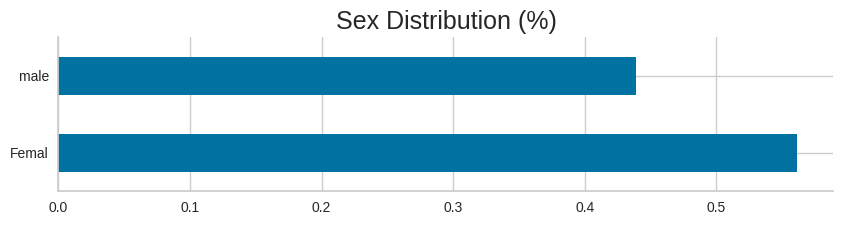

In [ ]:
print(df['Sex'].value_counts(ascending=True))
print(df['Sex'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['Sex'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Sex Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Femal', 'male']);

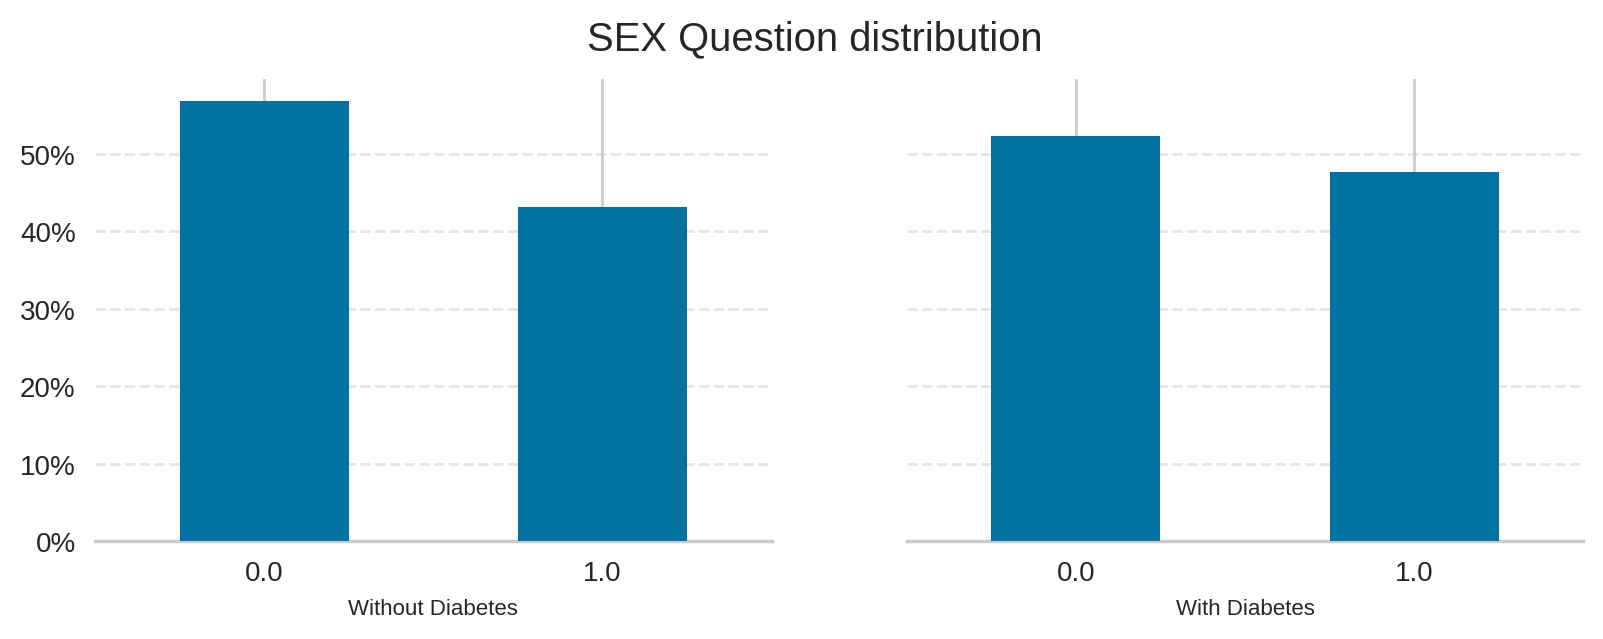

In [ ]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('SEX Question distribution')

(df[df['Diabetes_binary']==False]['Sex']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df[df['Diabetes_binary']==True]['Sex']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.grid(axis='y', linestyle='--', alpha=.5)

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

we have more female than male.

##Splitting

In [ ]:
x=df.drop("Diabetes_binary",axis=1)
y=df["Diabetes_binary"]

##Dealing with imbalancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler
OverS=RandomOverSampler(random_state=42, sampling_strategy='not majority')
x_over,y_over=OverS.fit_resample(x,y)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_over,y_over, test_size=0.3 , random_state=42)

In [ ]:
x_over.shape

(388754, 21)

##Modeling

#####Rondom Forest

In [ ]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(x_train, y_train)

y_pred=rf.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75     58349
         1.0       0.74      0.81      0.77     58278

    accuracy                           0.76    116627
   macro avg       0.76      0.76      0.76    116627
weighted avg       0.76      0.76      0.76    116627



In [ ]:
# make predictions on test set
y_pred=rf.predict(x_test)

print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))

Training set score: 0.7712
Test set score: 0.7603


######XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(x_train , y_train)

y_pred=xg.predict(x_test)

print('Training set score: {:.4f}'.format(xg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(xg.score(x_test, y_test)))

report = classification_report(y_test,y_pred)
print(report)

Training set score: 0.7516
Test set score: 0.7476
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.73     58349
         1.0       0.72      0.80      0.76     58278

    accuracy                           0.75    116627
   macro avg       0.75      0.75      0.75    116627
weighted avg       0.75      0.75      0.75    116627

